# <Center> Prediction of Closing Stock of Apple Inc. <center>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM

In [2]:
#tiingo can also be used
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021-03-01')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299


In [4]:
df.shape

(2304, 6)

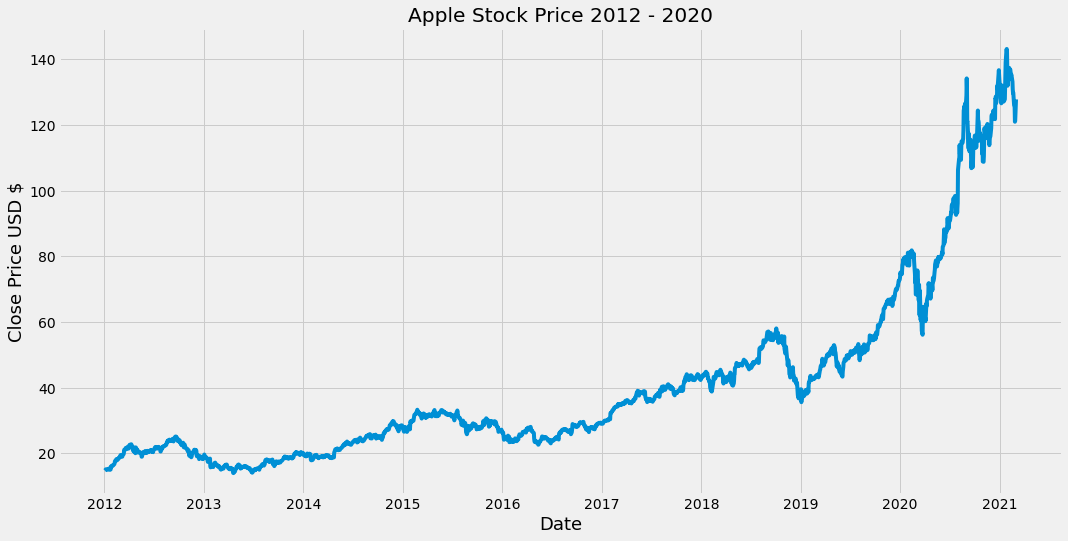

In [5]:
plt.figure(figsize=(16,8))
plt.title("Apple Stock Price 2012 - 2020")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [6]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=int((len(dataset)*0.8))
test_data_len=len(dataset)-training_data_len
training_data_len,test_data_len

(1843, 461)

In [7]:
#scaling - Preprocessing
scaler=MinMaxScaler(feature_range=(0,1))

In [8]:
s_data=scaler.fit_transform(dataset)

Train_test_split

In [9]:
#Creating training dataset
train_data=s_data[0:training_data_len , :]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [10]:
#create Test Dataset - new array of scaled values
test_data=s_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [11]:
#convert data to a np array
x_train,y_train=np.array(x_train),np.array(y_train) #to arrays
x_train,y_train

(array([[0.00572147, 0.00633231, 0.00760099, ..., 0.05982669, 0.0618997 ,
         0.06276759],
        [0.00633231, 0.00760099, 0.00880885, ..., 0.0618997 , 0.06276759,
         0.06062272],
        [0.00760099, 0.00880885, 0.00862367, ..., 0.06276759, 0.06062272,
         0.05777305],
        ...,
        [0.21408532, 0.21424011, 0.22339169, ..., 0.29287027, 0.28923284,
         0.28733675],
        [0.21424011, 0.22339169, 0.22906063, ..., 0.28923284, 0.28733675,
         0.28793653],
        [0.22339169, 0.22906063, 0.22917675, ..., 0.28733675, 0.28793653,
         0.28031342]]),
 array([0.06062272, 0.05777305, 0.06304676, ..., 0.28793653, 0.28031342,
        0.29937119]))

In [12]:
#convert data to a np array
x_test=np.array(x_test)
x_test

array([[0.22906063, 0.22917675, 0.22279191, ..., 0.28793653, 0.28031342,
        0.29937119],
       [0.22917675, 0.22279191, 0.22176647, ..., 0.28031342, 0.29937119,
        0.2967205 ],
       [0.22279191, 0.22176647, 0.21987035, ..., 0.29937119, 0.2967205 ,
        0.30175098],
       ...,
       [0.79436969, 0.81340815, 0.84181096, ..., 0.86719549, 0.866112  ,
        0.862165  ],
       [0.81340815, 0.84181096, 0.84459707, ..., 0.866112  , 0.862165  ,
        0.82842213],
       [0.84181096, 0.84459707, 0.84351359, ..., 0.862165  , 0.82842213,
        0.83051175]])

In [13]:
#reshaping data to 3d for LSTM
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#reshape data to 3d shape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [14]:
x_train.shape, x_test.shape

((1783, 60, 1), (461, 60, 1))

Model LSTM

In [15]:
#LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#compile
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
#training the model
model.fit(x_train,y_train,batch_size=1,epochs=1) #epoch is no. of iteration for entire df

1783/1783 [==============================] - 88s 49ms/step - loss: 1.8375e-04


In [18]:
#prediction
pred=model.predict(x_test)
pred=scaler.inverse_transform(pred)

In [19]:
#model evaluation (RMSE) SD of residuals. low RMSE is good fit
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred))) #must be less than 10% of the average price 

Root Mean Squared Error: 4.2822111073323255


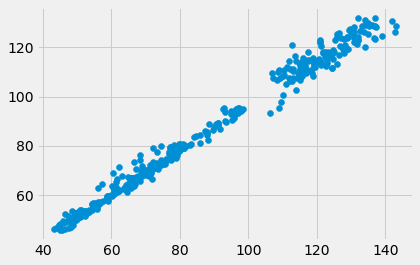

In [20]:
#visualizing the predictions
plt.scatter(y_test,pred)

C:\Users\VIJAYA~1\AppData\Local\Temp/ipykernel_6532/2177599876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=pred


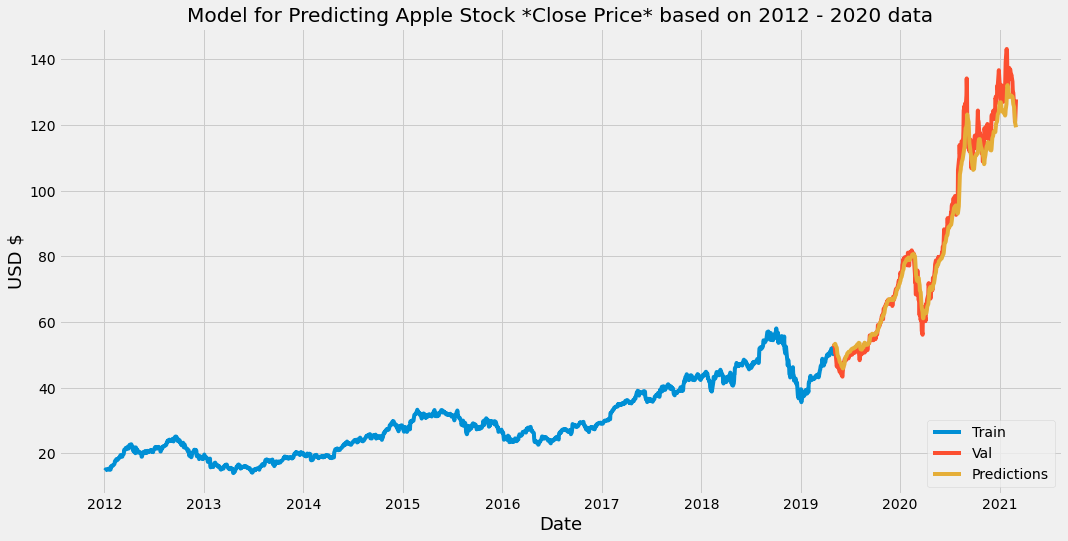

In [21]:
#datasets
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=pred
#visualizing the predictions
plt.figure(figsize=(16,8))
plt.title('Model for Predicting Apple Stock *Close Price* based on 2012 - 2020 data')
plt.xlabel('Date',fontsize=18)
plt.ylabel('USD $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [22]:
valid

,Close,Predictions
Date,,
2019-05-02,52.287498,52.599869
2019-05-03,52.937500,52.834946
2019-05-06,52.119999,53.160671
2019-05-07,50.715000,53.333389
2019-05-08,50.724998,53.188290
...,...,...
2021-02-23,125.860001,124.260399
2021-02-24,125.349998,123.078590
2021-02-25,120.989998,122.056221


In [23]:
#predicting for particular date - 2019-12-18
apple_quote= web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#new df
new_df=apple_quote.filter(['Close'])
#last60days
last60=new_df[-60:].values
#scale
last60_scaled=scaler.transform(last60)
#list
x_test1=[]
#append
x_test1.append(last60_scaled)
#convert to np array
x_test1=np.array(x_test1)
#reshape to 3d
x_test1=np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
#predictions
pred_price=model.predict(x_test1)
#inverseTransform
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[69.28571]]


In [24]:
apple_quote1= web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
apple_quote1['Close']

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64

In [25]:
#credits: https://www.youtube.com/watch?v=QIUxPv5PJOY&list=PLkryZz_29_pRiZUgPjVuFfq_5cJ9TXRiG&index=5